# PRE PROCESAMIENTO DE LA DATA

Importamos las bibliotecas necesarias para poder aplicar feature engineering al dataset y las bibliotecas propias para realizar el modelo de neural network.

In [1]:
!pip install opencv-python==3.4.2.16
!pip install opencv-contrib-python==3.4.2.16
import cv2
import numpy as np
import pandas as pd
import os
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt

In [ ]:
Para acceder al dataset, se accede directamente desde el link de github.

In [5]:
data = pd.read_csv('https://raw.githubusercontent.com/JumpNShootMan/TP_MachineLearning/master/datos_banco.csv', encoding='latin-1')

data.head(15)

,idPrestamo,target,monthly_debt_capacity,var_employment_time_in_months,approved_amount,approved_term,approved_interest_amount,var_net_income,person_gender,credit_history_marital_status,var_max_sbs_qual_12m,person_degree_type_desc,default_request_term,default_request_amount
0,LIBDISP9832897855,1,252.39,9.0,"1,200",6,289.11,1140.125000,MALE,C,NORMAL,Secundaria,1,0
1,LIBDISP9021501745,1,244.57,50.0,"2,200",12,696.15,1061.375000,FEMALE,S,NORMAL,Secundaria,0,0
2,LIBDISP4057314971,0,491.5,64.0,"1,000",3,84.99,2082.196667,FEMALE,S,NORMAL,Secundaria,0,0
3,LIBDISP8375185888,0,848.65,77.0,"1,500",6,221.53,3422.423333,MALE,S,NORMAL,Universitaria,0,0
4,LIBDISP9694463037,0,470.52,82.0,"1,000",3,91.34,1882.090000,FEMALE,S,NORMAL,Universitaria,1,0
5,LIBDISP0492929616,0,490.77,79.0,"1,500",6,221.53,2448.016667,MALE,S,NORMAL,Carrera TÃÂ©cnica,1,0
6,LIBDISP6813272232,0,428.57,71.0,"4,000",12,"1,109.56",1803.923333,FEMALE,S,NORMAL,Universitaria,0,0
7,LIBDISP8862427268,1,647.87,4.0,"1,200",6,289.11,2660.630000,MALE,S,NORMAL,Secundaria,1,0
8,LIBDISP7167831610,0,694.23,NaN,900,6,149.79,2912.158333,FEMALE,C,CPP,Universitaria,1,0
9,LIBDISP3835927929,1,209.48,77.0,"1,000",6,152.32,2498.043333,MALE,S,NORMAL,Secundaria,1,0


In [6]:
del data["idPrestamo"]
del data["default_request_amount"]

In [7]:
data.groupby('var_max_sbs_qual_12m').size()
data.groupby('person_degree_type_desc').size()

person_degree_type_desc
Carrera TÃÂ©cnica    432
Carrera TÌÄå©cnica    192
Postgrado              65
Primaria                3
Secundaria            220
Universitaria         807
dtype: int64

In [8]:
for i in range(len(data['person_degree_type_desc'])):
  if data['person_degree_type_desc'][i] == "Carrera TÃÂ©cnica" or data['person_degree_type_desc'][i] == "Carrera TÌÄå©cnica":
    data['person_degree_type_desc'][i] = "Carrera Tecnica"

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [15]:
data.var_max_sbs_qual_12m = pd.Categorical(data.var_max_sbs_qual_12m)
data.var_max_sbs_qual_12m = data.var_max_sbs_qual_12m.cat.codes
data.person_degree_type_desc = pd.Categorical(data.person_degree_type_desc)
data.person_degree_type_desc = data.person_degree_type_desc.cat.codes
data.head()

,target,monthly_debt_capacity,var_employment_time_in_months,approved_amount,approved_term,approved_interest_amount,var_net_income,person_gender,credit_history_marital_status,var_max_sbs_qual_12m,person_degree_type_desc,default_request_term
0,1,252.39,9.0,1200,6,289.11,1140.125000,0,0,3,3,1
1,1,244.57,50.0,2200,12,696.15,1061.375000,1,1,3,3,0
2,0,491.50,64.0,1000,3,84.99,2082.196667,1,1,3,3,0
3,0,848.65,77.0,1500,6,221.53,3422.423333,0,1,3,4,0
4,0,470.52,82.0,1000,3,91.34,1882.090000,1,1,3,4,1


In [16]:
genero = {'MALE': 0, 'FEMALE': 1, 0: 0, 1: 1}
estado = {'C': 0 , 'S': 1, 'D': 2, 'V': 3, 0:0,1:1,2:2,3:3}
data.person_gender = [genero[item] for item in data.person_gender]
data.credit_history_marital_status = [estado[item] for item in data.credit_history_marital_status]
data.credit_history_marital_status = [estado[item] for item in data.credit_history_marital_status]
data.head()

,target,monthly_debt_capacity,var_employment_time_in_months,approved_amount,approved_term,approved_interest_amount,var_net_income,person_gender,credit_history_marital_status,var_max_sbs_qual_12m,person_degree_type_desc,default_request_term
0,1,252.39,9.0,1200,6,289.11,1140.125000,0,0,3,3,1
1,1,244.57,50.0,2200,12,696.15,1061.375000,1,1,3,3,0
2,0,491.50,64.0,1000,3,84.99,2082.196667,1,1,3,3,0
3,0,848.65,77.0,1500,6,221.53,3422.423333,0,1,3,4,0
4,0,470.52,82.0,1000,3,91.34,1882.090000,1,1,3,4,1


In [10]:
data.describe()

,target,var_employment_time_in_months,approved_term,var_net_income,person_gender,credit_history_marital_status,default_request_term
count,1719.000000,1519.000000,1719.000000,1719.000000,1719.000000,1719.000000,1719.000000
mean,0.295521,33.979592,6.464805,2693.545884,0.335079,0.845841,0.507853
std,0.456409,26.889423,3.009842,1825.694773,0.472155,0.386130,0.500084
min,0.000000,-1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,11.000000,6.000000,1750.000000,0.000000,1.000000,0.000000
50%,0.000000,26.000000,6.000000,2373.758333,0.000000,1.000000,1.000000
75%,1.000000,61.000000,6.000000,3075.133333,1.000000,1.000000,1.000000
max,1.000000,87.000000,12.000000,28587.000000,1.000000,3.000000,1.000000


In [11]:
indices = []
print("\t\t Features \t miss values \t values")
for i in data:
  count = 0
  for j in range(len(data[i])):
    if data[i].dtype == "float64":
      if np.isnan(data[i][j]):
        count +=1
        indices.append(j)
        data[i][j] = 33.979592
  print("%30s \t %10d  %10d"%(i, count,len(data[i])) )

print(indices)

		 Features 	 miss values 	 values
                        target 	          0        1719
         monthly_debt_capacity 	          0        1719
 var_employment_time_in_months 	        200        1719
               approved_amount 	          0        1719
                 approved_term 	          0        1719
      approved_interest_amount 	          0        1719
                var_net_income 	          0        1719
                 person_gender 	          0        1719
 credit_history_marital_status 	          0        1719
          var_max_sbs_qual_12m 	          0        1719
       person_degree_type_desc 	          0        1719
          default_request_term 	          0        1719
[8, 40, 70, 74, 76, 103, 109, 114, 133, 141, 147, 164, 169, 171, 198, 207, 212, 219, 233, 262, 265, 268, 269, 270, 275, 289, 293, 309, 317, 322, 334, 339, 340, 355, 361, 364, 372, 394, 398, 399, 402, 415, 439, 444, 471, 475, 484, 488, 493, 494, 497, 499, 516, 520, 525, 539, 559, 568, 570, 573

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [12]:
for i in data:
  for j in range(len(data[i])):
    if type(data[i][j]) == str:
      data[i][j] = data[i][j].replace(',', '')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [17]:
for i in data:
  if data[i].dtype == object:
    data[i] = pd.to_numeric(data[i])

In [18]:
data

,target,monthly_debt_capacity,var_employment_time_in_months,approved_amount,approved_term,approved_interest_amount,var_net_income,person_gender,credit_history_marital_status,var_max_sbs_qual_12m,person_degree_type_desc,default_request_term
0,1,252.39,9.0,1200,6,289.11,1140.125000,0,0,3,3,1
1,1,244.57,50.0,2200,12,696.15,1061.375000,1,1,3,3,0
2,0,491.50,64.0,1000,3,84.99,2082.196667,1,1,3,3,0
3,0,848.65,77.0,1500,6,221.53,3422.423333,0,1,3,4,0
4,0,470.52,82.0,1000,3,91.34,1882.090000,1,1,3,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1714,0,617.02,4.0,5000,12,1515.20,2143.166667,1,1,0,0,0
1715,0,250.69,74.0,1200,6,179.92,2204.136667,1,1,3,1,1
1716,0,692.13,56.0,2500,6,360.78,2768.500000,0,1,3,4,0
1717,0,410.28,80.0,900,3,79.89,2139.258333,0,1,3,0,1


# MODELO NEURAL NETWORK

Importamos todas las bibliotecas necesarias

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [20]:
x = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [21]:
estandarizacion = StandardScaler().fit_transform(x)
x2 = pd.DataFrame(data=estandarizacion, columns=x.columns)
x2

,target,monthly_debt_capacity,var_employment_time_in_months,approved_amount,approved_term,approved_interest_amount,var_net_income,person_gender,credit_history_marital_status,var_max_sbs_qual_12m,person_degree_type_desc
0,1.543975,-0.722556,-0.988567,-0.622794,-0.154473,-0.289697,-0.851113,-0.709885,-2.191196,0.390188,0.377746
1,1.543975,-0.739563,0.634007,0.041875,1.839567,0.708968,-0.894260,1.408678,0.399358,0.390188,0.377746
2,-0.647679,-0.202554,1.188057,-0.755728,-1.151493,-0.790501,-0.334956,1.408678,0.399358,0.390188,0.377746
3,-0.647679,0.574154,1.702531,-0.423393,-0.154473,-0.455503,0.399349,-0.709885,0.399358,0.390188,0.919772
4,-0.647679,-0.248180,1.900406,-0.755728,-1.151493,-0.774921,-0.444593,1.408678,0.399358,0.390188,0.919772
...,...,...,...,...,...,...,...,...,...,...,...
1714,-0.647679,0.070419,-1.186441,1.902950,1.839567,2.718490,-0.301551,1.408678,0.399358,-2.635673,-1.248329
1715,-0.647679,-0.726253,1.583806,-0.622794,-0.154473,-0.557592,-0.268145,1.408678,0.399358,0.390188,-0.706304
1716,-0.647679,0.233764,0.871457,0.241276,-0.154473,-0.113856,0.041067,-0.709885,0.399358,0.390188,0.919772
1717,-0.647679,-0.379187,1.821256,-0.822195,-1.151493,-0.803014,-0.303692,-0.709885,0.399358,0.390188,-1.248329


Creamos nuestros datasets de test.

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(x2, y, test_size=0.3)
red_neuronal = MLPClassifier(hidden_layer_sizes=(8,2), max_iter=100, learning_rate_init=0.01, activation='logistic')
red_neuronal.fit(X_train, Y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(8, 2), learning_rate='constant',
              learning_rate_init=0.01, max_fun=15000, max_iter=100,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [23]:
red_neuronal.coefs_

[array([[ 9.91229852e-02,  6.63917853e-01,  3.45801191e-01,
          6.96701347e-02,  7.79832648e-02,  3.07830028e-01,
          7.17249376e-01,  3.07464796e-01],
        [-5.04067680e-01,  7.05685086e-02, -6.16225227e-01,
          1.03389313e+00,  3.17772283e-02,  9.29596325e-01,
          1.25010314e+00, -5.99452012e-01],
        [-1.52422922e-01, -2.35259004e-01,  2.71701896e-01,
          5.95668716e-01,  7.50131499e-01,  7.13145042e-01,
          3.07198033e-01,  2.35671484e-01],
        [ 1.05745511e+00,  1.26630118e+00, -3.87824855e-01,
         -4.90336199e-01,  9.40818980e-01,  1.73691904e-01,
          1.74502479e-01, -3.39794866e-01],
        [ 1.45682443e+00,  8.31698000e-01,  4.07988164e+00,
         -3.49761820e-01,  5.87083248e-01,  7.68647167e-01,
          1.61067592e+00,  4.38336987e+00],
        [-3.57997146e-01, -7.00361121e-01,  2.81919879e+00,
          1.02343627e+00, -6.97698455e-02,  1.21097993e+00,
          1.59103719e+00,  2.65685176e+00],
        [-2.4172

Realizamos un fold de 10 particiones

In [24]:
kfold = KFold(n_splits = 10)
cv_resultado = cross_val_score(red_neuronal, X_train, Y_train, cv=kfold, scoring='f1_macro')
print(cv_resultado)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[0.68169214 0.71695906 0.61009667 0.65277778 0.64085642 0.65909091
 0.68739824 0.57876639 0.61604286 0.62951528]


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Imprimimos los resultados de los folds

In [25]:
for i in range(len(cv_resultado)):
  print("F1 en {} fold = {:.2f}".format(i+1, cv_resultado[i]))

F1 en 1 fold = 0.68
F1 en 2 fold = 0.72
F1 en 3 fold = 0.61
F1 en 4 fold = 0.65
F1 en 5 fold = 0.64
F1 en 6 fold = 0.66
F1 en 7 fold = 0.69
F1 en 8 fold = 0.58
F1 en 9 fold = 0.62
F1 en 10 fold = 0.63


Promedio de los folds de la red neuronal 1

In [26]:
promedio = np.mean(cv_resultado)
print("promedio: ", promedio)

promedio:  0.6473195756088537


In [27]:
pesos_5 = [z for x in red_neuronal.coefs_ for y in x for z in y]

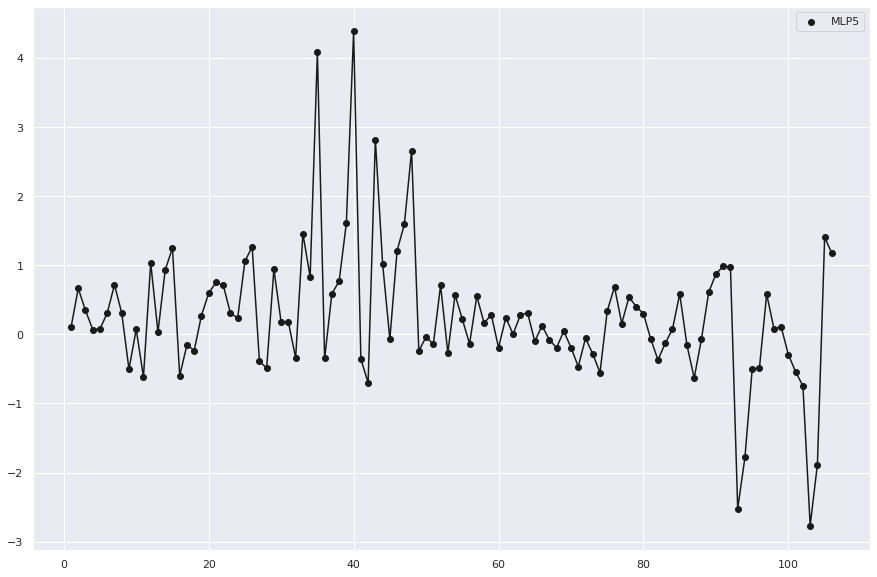

In [28]:
x = np.linspace(1,len(pesos_5),len(pesos_5))
plt.figure(figsize=(15,10))
plt.scatter(x,pesos_5, color='k', label='MLP5')
plt.plot(x,pesos_5, color='k')
plt.legend()

Creamos una red nueronal 2

In [46]:
red_neuronal2 = MLPClassifier(hidden_layer_sizes=(8,2), max_iter=100, learning_rate_init=0.01, activation='logistic', alpha= 0.5)
red_neuronal2.fit(X_train, Y_train)

MLPClassifier(activation='logistic', alpha=0.5, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(8, 2), learning_rate='constant',
              learning_rate_init=0.01, max_fun=15000, max_iter=100,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [47]:
red_neuronal2.coefs_

[array([[-3.17005096e-03,  9.30409955e-04,  1.02244115e-03,
         -3.65315334e-03,  1.17449375e-03,  1.00540900e-03,
         -3.09601371e-03,  1.43429888e-03],
        [-4.93267101e-04, -1.08941123e-03, -9.05002902e-04,
         -1.01763020e-03, -1.30764277e-03, -1.05938051e-03,
         -1.08552986e-03, -8.28438745e-04],
        [-1.24613795e-03,  1.10707191e-03, -1.19148976e-03,
         -1.32869676e-03, -1.87464926e-04,  9.88209191e-04,
          1.36850898e-03, -9.35306657e-04],
        [-3.79232138e-03, -4.50698747e-03, -4.84594417e-03,
         -1.40767270e-03, -6.54385554e-03, -3.76421351e-03,
         -6.35152913e-04, -3.56147332e-03],
        [-4.88735011e-03, -8.36899149e-03, -7.75121906e-03,
         -8.24113901e-03, -8.20394184e-03, -2.92455067e-03,
         -4.81942737e-03, -7.01112106e-03],
        [-7.65338191e-03, -8.21285801e-03, -6.45493215e-03,
         -5.86638376e-03, -1.01914774e-02, -4.79125065e-03,
         -6.67698578e-03,  9.52711379e-04],
        [-4.0314

In [48]:
k=10
kfold = KFold(n_splits = k)
cv_resultado2 = cross_val_score(red_neuronal2, X_train, Y_train, cv=kfold, scoring='f1_macro')
print(cv_resultado2)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[0.66800148 0.7067636  0.60374063 0.62984724 0.6534018  0.67032967
 0.68997416 0.58333333 0.56937799 0.63204654]


In [49]:
for i in range(len(cv_resultado2)):
  print("F1 en {} fold = {:.2f}".format(i+1, cv_resultado2[i]))

F1 en 1 fold = 0.67
F1 en 2 fold = 0.71
F1 en 3 fold = 0.60
F1 en 4 fold = 0.63
F1 en 5 fold = 0.65
F1 en 6 fold = 0.67
F1 en 7 fold = 0.69
F1 en 8 fold = 0.58
F1 en 9 fold = 0.57
F1 en 10 fold = 0.63


In [50]:
pesos = [z for x in red_neuronal2.coefs_ for y in x for z in y]

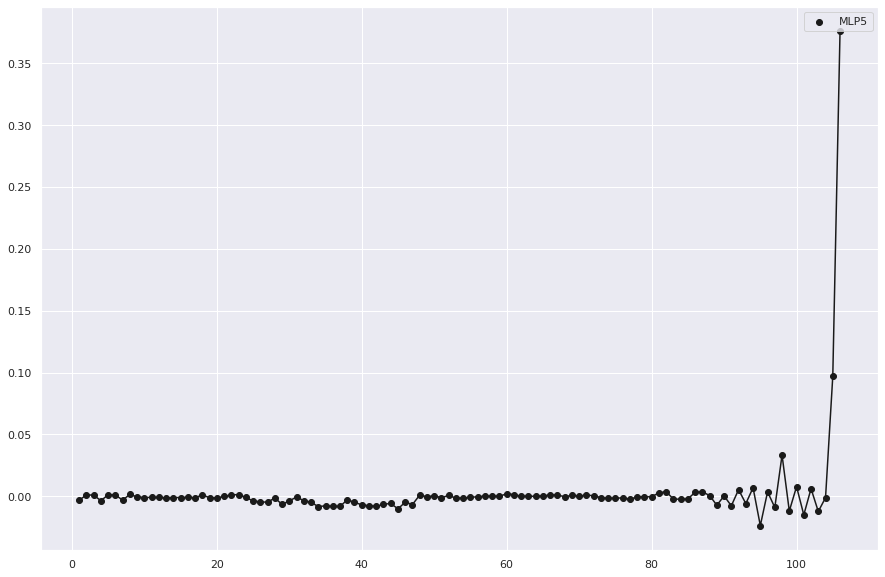

In [51]:
x2 = np.linspace(1,len(pesos),len(pesos))
plt.figure(figsize=(15,10))
plt.scatter(x2,pesos, color='k', label='MLP5')
plt.plot(x2,pesos, color='k')
plt.legend()

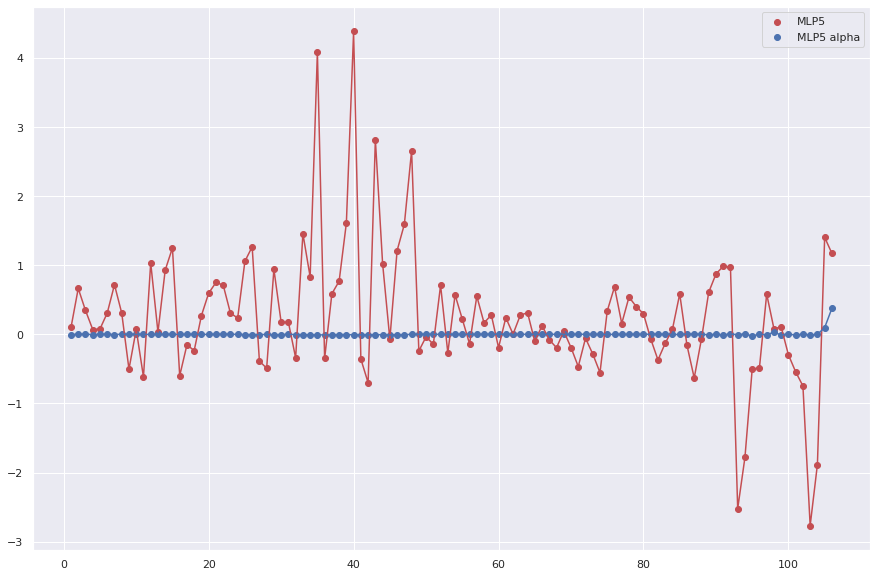

In [52]:
plt.figure(figsize=(15,10))
plt.scatter(x,pesos_5, color='R', label='MLP5')
plt.scatter(x2,pesos, color='B', label='MLP5 alpha')
plt.plot(x,pesos_5, color='R')
plt.plot(x2,pesos, color='B')
plt.legend()

In [41]:
red_neuronal3 = MLPClassifier(hidden_layer_sizes=(5,4), max_iter=100, learning_rate_init=0.0001, activation='logistic')
red_neuronal3.fit(X_train, Y_train)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(5, 4), learning_rate='constant',
              learning_rate_init=0.0001, max_fun=15000, max_iter=100,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [42]:
red_neuronal3.coefs_

[array([[ 0.34240802, -0.02247297, -0.23759962,  0.01999638, -0.09172066],
        [-0.23164811, -0.26258199, -0.34653013, -0.19066625, -0.1033221 ],
        [-0.0559385 , -0.28707821,  0.11099467, -0.02029885, -0.0797599 ],
        [ 0.32372302, -0.05761989, -0.25846217, -0.33981131,  0.0734484 ],
        [ 0.06134148,  0.12760147,  0.25140951,  0.13570075, -0.23469863],
        [-0.31129438,  0.0058443 , -0.1074397 ,  0.0570471 ,  0.02092378],
        [-0.07461181, -0.18794992, -0.00761407, -0.22189968,  0.32073126],
        [ 0.04095521, -0.25349715,  0.16041869, -0.26606256, -0.00982628],
        [-0.23952787,  0.01717608, -0.05177879, -0.12113706, -0.30654747],
        [ 0.24153811,  0.16638671, -0.31807869,  0.21410034, -0.33116828],
        [ 0.04991171, -0.09381787,  0.27442277,  0.08513977,  0.07988809]]),
 array([[ 0.42743952,  0.44191488, -0.16766552, -0.47219478],
        [-0.20192399, -0.23114804,  0.396525  , -0.4364658 ],
        [ 0.05240889, -0.43656724, -0.02594089,  

In [43]:
kfold = KFold(n_splits = 10)
cv_resultado2 = cross_val_score(red_neuronal2, X_train, Y_train, cv=kfold, scoring='f1_macro')
print(cv_resultado2)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[0.67531306 0.7067636  0.60374063 0.66834385 0.66536531 0.68121442
 0.68997416 0.58333333 0.59013283 0.625     ]


In [44]:
np.mean(cv_resultado2)

0.6489181194770927

In [45]:
for i in range(len(cv_resultado2)):
  print("F1 en {} fold = {:.2f}".format(i+1, cv_resultado2[i]))

F1 en 1 fold = 0.68
F1 en 2 fold = 0.71
F1 en 3 fold = 0.60
F1 en 4 fold = 0.67
F1 en 5 fold = 0.67
F1 en 6 fold = 0.68
F1 en 7 fold = 0.69
F1 en 8 fold = 0.58
F1 en 9 fold = 0.59
F1 en 10 fold = 0.62


# MODELO NEURAL NETWORK CON DATASET 2


Tal como en el primer modelo, se realizan los mismos pasos, solo que con el dataset pre procesado de una manera distinta.

In [56]:
data2 = pd.read_csv('https://raw.githubusercontent.com/JumpNShootMan/TP_MachineLearning/master/datos_banco_post.csv', encoding='latin-1')


In [57]:
data2

,Unnamed: 0,target,monthly_debt_capacity,var_employment_time_in_months,approved_amount,approved_term,approved_interest_amount,var_net_income,default_request_term,person_gender_FEMALE,person_gender_MALE,credit_history_marital_status_C,credit_history_marital_status_D,credit_history_marital_status_S,credit_history_marital_status_V,var_max_sbs_qual_12m_CPP,var_max_sbs_qual_12m_DEFICIENTE,var_max_sbs_qual_12m_DUDOSO,var_max_sbs_qual_12m_NORMAL,var_max_sbs_qual_12m_PERDIDA,person_degree_type_desc_Carrera Tecnica,person_degree_type_desc_Postgrado,person_degree_type_desc_Primaria,person_degree_type_desc_Secundaria,person_degree_type_desc_Universitaria
0,0,1,0.055545,0.113636,0.059829,6,0.116370,0.039883,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0
1,1,1,0.054488,0.579545,0.145299,12,0.294249,0.037128,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
2,2,0,0.087848,0.738636,0.042735,3,0.027169,0.072837,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
3,3,0,0.136099,0.886364,0.085470,6,0.086837,0.119720,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1
4,4,0,0.085014,0.943182,0.042735,3,0.029944,0.065837,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1714,1714,0,0.104806,0.056818,0.384615,12,0.652178,0.074970,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0
1715,1715,0,0.055315,0.852273,0.059829,6,0.068654,0.077103,1,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0
1716,1716,0,0.114953,0.647727,0.170940,6,0.147690,0.096845,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1
1717,1717,0,0.076876,0.920455,0.034188,3,0.024940,0.074833,1,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0


In [58]:
x = data2.iloc[:,:-1]
y = data2.iloc[:,-1]

In [59]:
estandarizacion = StandardScaler().fit_transform(x)
x2 = pd.DataFrame(data=estandarizacion, columns=x.columns)
x2

,Unnamed: 0,target,monthly_debt_capacity,var_employment_time_in_months,approved_amount,approved_term,approved_interest_amount,var_net_income,default_request_term,person_gender_FEMALE,person_gender_MALE,credit_history_marital_status_C,credit_history_marital_status_D,credit_history_marital_status_S,credit_history_marital_status_V,var_max_sbs_qual_12m_CPP,var_max_sbs_qual_12m_DEFICIENTE,var_max_sbs_qual_12m_DUDOSO,var_max_sbs_qual_12m_NORMAL,var_max_sbs_qual_12m_PERDIDA,person_degree_type_desc_Carrera Tecnica,person_degree_type_desc_Postgrado,person_degree_type_desc_Primaria,person_degree_type_desc_Secundaria
0,-1.731044,1.543975,-0.722556,-0.988567,-0.622794,-0.154473,-0.289697,-0.851113,0.984415,-0.709885,0.709885,2.266999,-0.087294,-2.201576,-0.024126,-0.364908,-0.135517,-0.024126,0.400877,-0.048295,-0.754893,-0.198239,-0.041812,2.610294
1,-1.729028,1.543975,-0.739563,0.634007,0.041875,1.839567,0.708968,-0.894260,-1.015832,1.408678,-1.408678,-0.441112,-0.087294,0.454220,-0.024126,-0.364908,-0.135517,-0.024126,0.400877,-0.048295,-0.754893,-0.198239,-0.041812,2.610294
2,-1.727013,-0.647679,-0.202554,1.188057,-0.755728,-1.151493,-0.790501,-0.334956,-1.015832,1.408678,-1.408678,-0.441112,-0.087294,0.454220,-0.024126,-0.364908,-0.135517,-0.024126,0.400877,-0.048295,-0.754893,-0.198239,-0.041812,2.610294
3,-1.724998,-0.647679,0.574154,1.702531,-0.423393,-0.154473,-0.455503,0.399349,-1.015832,-0.709885,0.709885,-0.441112,-0.087294,0.454220,-0.024126,-0.364908,-0.135517,-0.024126,0.400877,-0.048295,-0.754893,-0.198239,-0.041812,-0.383099
4,-1.722983,-0.647679,-0.248180,1.900406,-0.755728,-1.151493,-0.774921,-0.444593,0.984415,1.408678,-1.408678,-0.441112,-0.087294,0.454220,-0.024126,-0.364908,-0.135517,-0.024126,0.400877,-0.048295,-0.754893,-0.198239,-0.041812,-0.383099
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1714,1.722983,-0.647679,0.070419,-1.186441,1.902950,1.839567,2.718490,-0.301551,-1.015832,1.408678,-1.408678,-0.441112,-0.087294,0.454220,-0.024126,2.740420,-0.135517,-0.024126,-2.494532,-0.048295,1.324692,-0.198239,-0.041812,-0.383099
1715,1.724998,-0.647679,-0.726253,1.583806,-0.622794,-0.154473,-0.557592,-0.268145,0.984415,1.408678,-1.408678,-0.441112,-0.087294,0.454220,-0.024126,-0.364908,-0.135517,-0.024126,0.400877,-0.048295,-0.754893,5.044418,-0.041812,-0.383099
1716,1.727013,-0.647679,0.233764,0.871457,0.241276,-0.154473,-0.113856,0.041067,-1.015832,-0.709885,0.709885,-0.441112,-0.087294,0.454220,-0.024126,-0.364908,-0.135517,-0.024126,0.400877,-0.048295,-0.754893,-0.198239,-0.041812,-0.383099
1717,1.729028,-0.647679,-0.379187,1.821256,-0.822195,-1.151493,-0.803014,-0.303692,0.984415,-0.709885,0.709885,-0.441112,-0.087294,0.454220,-0.024126,-0.364908,-0.135517,-0.024126,0.400877,-0.048295,1.324692,-0.198239,-0.041812,-0.383099


In [60]:
X_train, X_test, Y_train, Y_test = train_test_split(x2, y, test_size=0.3)
red_neuronal = MLPClassifier(hidden_layer_sizes=(8,2), max_iter=100, learning_rate_init=0.01, activation='logistic')
red_neuronal.fit(X_train, Y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(8, 2), learning_rate='constant',
              learning_rate_init=0.01, max_fun=15000, max_iter=100,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [61]:
red_neuronal.coefs_

[array([[ 9.34323475e-03,  1.00786386e-02,  7.43284777e-03,
         -5.79318213e-03, -1.35243739e-02, -1.01574438e-02,
         -8.20040173e-03, -8.83212873e-03],
        [ 4.05608362e-02,  3.47403316e-02,  2.98086551e-02,
         -4.17928806e-02, -3.59574065e-02, -4.46521642e-02,
         -4.31023678e-02, -4.69783555e-02],
        [-1.69164255e-02, -1.62795715e-02,  2.31311273e-02,
          5.96289968e-02, -4.06821892e-02,  2.34679133e-02,
          3.08837947e-02, -5.99813466e-03],
        [ 5.69294120e-02,  1.67842805e-02,  2.84585436e-02,
         -3.18001755e-02, -4.75525811e-02, -5.21121807e-02,
         -4.14108116e-02, -5.40058235e-02],
        [-7.02761708e-02, -5.16721794e-02,  2.82103157e-02,
          4.97258791e-02, -1.27795311e-02, -2.78560203e-02,
          7.01044213e-02,  1.83534266e-03],
        [ 1.34260087e-03,  7.56471045e-02,  6.51656720e-02,
         -6.33299075e-02,  3.45815954e-02,  1.45924390e-02,
         -8.70323593e-02, -8.88920202e-02],
        [-1.3360

In [62]:
k=10
kfold = KFold(n_splits = k)
cv_resultado = cross_val_score(red_neuronal, X_train, Y_train, cv=kfold, scoring='f1_macro')
print(cv_resultado)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[1.         1.         1.         1.         1.         1.
 1.         0.99161953 1.         0.99134886]


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


La primera sorpresa que tenemos es que los folds dan resultados muy elevados, esto a causa de que los valores de algunas columnas tuvieron reducción de cardinalidad, lo cual se ve reflejado en los resultados.

In [63]:
for i in range(len(cv_resultado)):
  print("F1 en {} fold = {:.2f}".format(i+1, cv_resultado[i]))

F1 en 1 fold = 1.00
F1 en 2 fold = 1.00
F1 en 3 fold = 1.00
F1 en 4 fold = 1.00
F1 en 5 fold = 1.00
F1 en 6 fold = 1.00
F1 en 7 fold = 1.00
F1 en 8 fold = 0.99
F1 en 9 fold = 1.00
F1 en 10 fold = 0.99


In [64]:
promedio = np.mean(cv_resultado)
print("promedio: ", promedio)

promedio:  0.9982968383831485


In [65]:
pesos_5 = [z for x in red_neuronal.coefs_ for y in x for z in y]

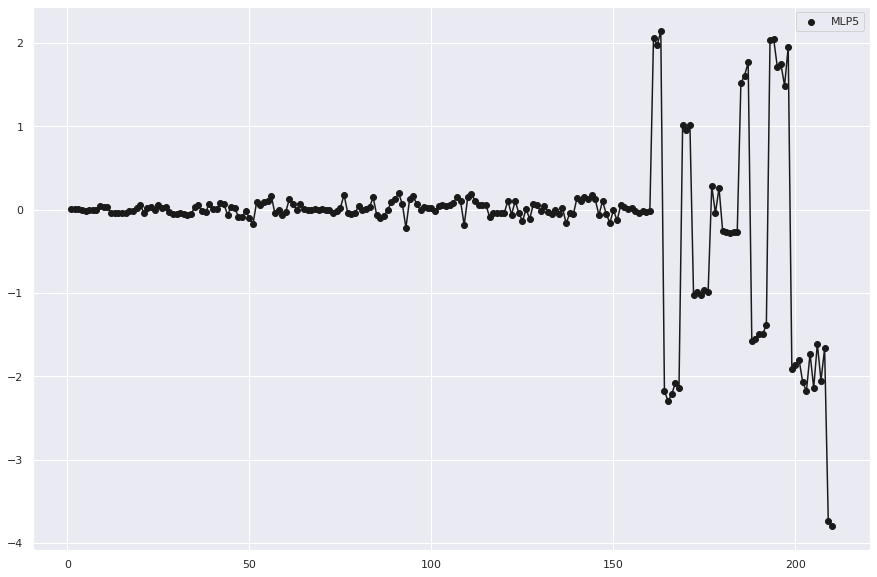

In [66]:
x = np.linspace(1,len(pesos_5),len(pesos_5))
plt.figure(figsize=(15,10))
plt.scatter(x,pesos_5, color='k', label='MLP5')
plt.plot(x,pesos_5, color='k')
plt.legend()

A esta red nueronal 2 se le aplica alpha = 2, y los resultados son muy similares a la red neuronal 1, esto debido a que la red 1 ya esaba en overfitting.

In [67]:
red_neuronal2 = MLPClassifier(hidden_layer_sizes=(8,2), max_iter=100, learning_rate_init=0.01, activation='logistic', alpha= 0.2)
red_neuronal2.fit(X_train, Y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='logistic', alpha=0.2, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(8, 2), learning_rate='constant',
              learning_rate_init=0.01, max_fun=15000, max_iter=100,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [68]:
red_neuronal2.coefs_

[array([[ 1.05294858e-02,  1.17633771e-02,  1.25748901e-02,
          1.23862304e-02, -8.58291825e-03,  1.09774532e-02,
         -8.60643023e-03,  1.16044395e-02],
        [-3.48144196e-02, -3.48593562e-02, -3.49384171e-02,
         -3.48953205e-02,  3.53972967e-02, -3.48142781e-02,
          3.53450028e-02, -3.45134408e-02],
        [ 1.48120870e-02,  1.56392105e-02,  1.62214085e-02,
          1.59197236e-02, -1.31270975e-02,  1.53529327e-02,
         -1.24743467e-02,  1.62288255e-02],
        [-1.46579120e-02, -1.46204126e-02, -1.48814999e-02,
         -1.48125726e-02,  1.56609917e-02, -1.47782736e-02,
          1.55275606e-02, -1.48569121e-02],
        [ 2.06943210e-02,  2.08714834e-02,  2.05996768e-02,
          2.07558238e-02, -2.00638194e-02,  2.05166776e-02,
         -2.00109664e-02,  2.06326789e-02],
        [-2.06456380e-02, -2.02292995e-02, -2.00698396e-02,
         -1.97664021e-02,  2.38023780e-02, -1.99222906e-02,
          2.38924223e-02, -1.99469630e-02],
        [ 1.9410

In [69]:
k=10
kfold = KFold(n_splits = k)
cv_resultado2 = cross_val_score(red_neuronal2, X_train, Y_train, cv=kfold, scoring='f1_macro')
print(cv_resultado2)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


se observa un ligero aumento

In [70]:
for i in range(len(cv_resultado2)):
  print("F1 en {} fold = {:.2f}".format(i+1, cv_resultado2[i]))

F1 en 1 fold = 1.00
F1 en 2 fold = 1.00
F1 en 3 fold = 1.00
F1 en 4 fold = 1.00
F1 en 5 fold = 1.00
F1 en 6 fold = 1.00
F1 en 7 fold = 1.00
F1 en 8 fold = 1.00
F1 en 9 fold = 1.00
F1 en 10 fold = 1.00


In [78]:
promedio = np.mean(cv_resultado2)
print("promedio: ", promedio)

promedio:  1.0


In [72]:
pesos = [z for x in red_neuronal2.coefs_ for y in x for z in y]

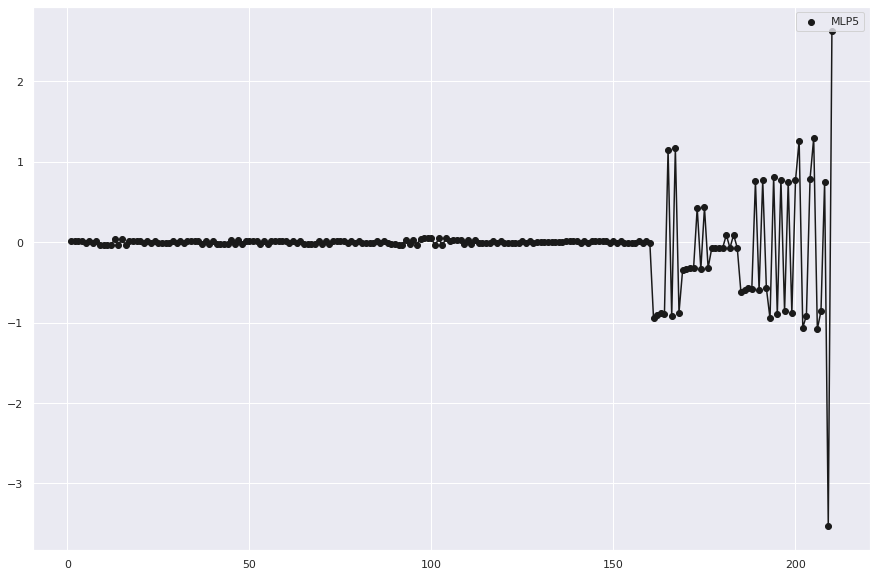

In [73]:
x2 = np.linspace(1,len(pesos),len(pesos))
plt.figure(figsize=(15,10))
plt.scatter(x2,pesos, color='k', label='MLP5')
plt.plot(x2,pesos, color='k')
plt.legend()

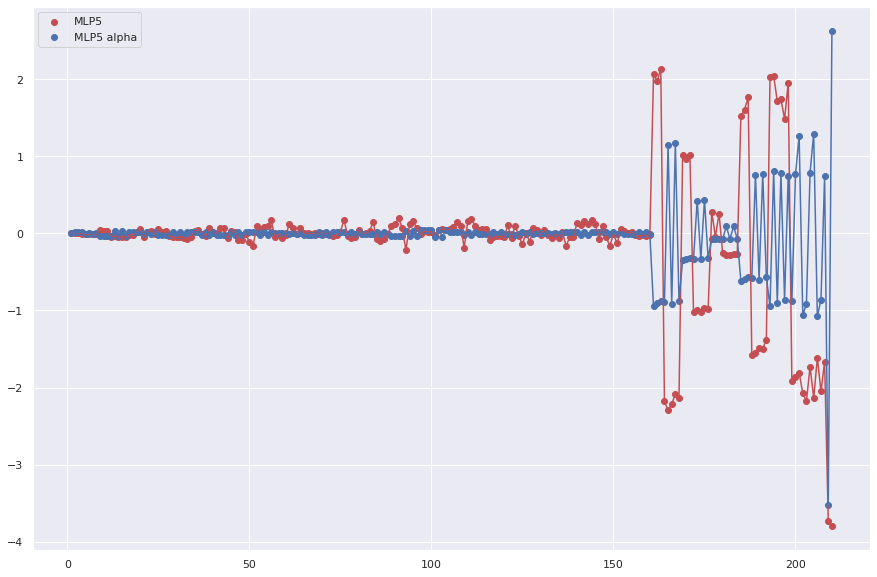

In [74]:
plt.figure(figsize=(15,10))
plt.scatter(x,pesos_5, color='R', label='MLP5')
plt.scatter(x2,pesos, color='B', label='MLP5 alpha')
plt.plot(x,pesos_5, color='R')
plt.plot(x2,pesos, color='B')
plt.legend()